In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from collections import defaultdict
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
import copy
import math
from scipy import stats

Data Preprocessing and Overview

In [84]:
df_sub = pd.read_pickle('subscribers')
df_reps = pd.read_pickle('customer_service_reps')
df_eng = pd.read_pickle('engagement')
df_channel = pd.read_csv("channel_spend_graduate.csv")

In [58]:
df_sub.head()

subid package_type  num_weekly_services_utilized preferred_genre  \
162502  21724479      economy                           NaN          comedy   
380374  23383224         base                           NaN          comedy   
496617  26844789     enhanced                      3.362885        regional   
356799  29417030         base                           NaN           drama   
681701  26723159         base                      3.731089          comedy   

                       intended_use  weekly_consumption_hour  \
162502  access to exclusive content                      NaN   
380374  access to exclusive content                22.951579   
496617                  replace OTT                36.001186   
356799                  replace OTT                20.051667   
681701                  replace OTT                22.951579   

        num_ideal_streaming_services  retarget_TF   age male_TF  ...  \
162502                           NaN        False   NaN   False  ...   
380374                           NaN        False  70.0   False  ...   
496617                      1.951776        False  25.0    True  ...   
356799                           NaN        False  30.0   False  ...   
681701                      2.506384        False  28.0   False  ...   

       creation_until_cancel_days cancel_before_trial_end trial_end_date  \
162502                        NaN                    True     2020-02-08   
380374                        0.0                   False     2020-03-16   
496617                        1.0                   False     2019-12-22   
356799                        0.0                   False     2020-02-11   
681701                        9.0                   False     2019-10-20   

       initial_credit_card_declined  revenue_net join_fee  language  paid_TF  \
162502                        False          NaN      NaN        ar     True   
380374                        False          0.0   0.3303        ar    False   
496617                        False          0.0   0.1101        ar    False   
356799                        False          0.0   0.0367        ar    False   
681701                        False          0.0   0.0367        ar    False   

       refund_after_trial_TF      payment_type  
162502                 False  Standard Charter  
380374                 False               NaN  
496617                 False               NaN  
356799                 False               NaN  
681701                 False               NaN  

[5 rows x 29 columns]

In [143]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227628 entries, 162502 to 598241
Data columns (total 29 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   subid                         227628 non-null  int64         
 1   package_type                  192054 non-null  object        
 2   num_weekly_services_utilized  117178 non-null  float64       
 3   preferred_genre               191302 non-null  object        
 4   intended_use                  224079 non-null  object        
 5   weekly_consumption_hour       189698 non-null  float64       
 6   num_ideal_streaming_services  115458 non-null  float64       
 7   retarget_TF                   227628 non-null  bool          
 8   age                           192459 non-null  float64       
 9   male_TF                       227359 non-null  object        
 10  country                       227628 non-null  object        
 11  attribut

In [59]:
df_reps.head()

customer_service_rep_id     subid  current_sub_TF cancel_date  \
4                 36189811  25108574           False         NaT   
5                 36189811  25108574           False         NaT   
6                 36189811  25108574           False         NaT   
7                 36189811  25108574           False         NaT   
8                 31174901  25914865            True         NaT   

  account_creation_date  num_trial_days  trial_completed_TF billing_channel  \
4   2019-11-26 03:30:29               7                True          itunes   
5   2019-11-26 03:30:29               7                True          itunes   
6   2019-11-26 03:30:29               7                True          itunes   
7   2019-11-26 03:30:29               7                True          itunes   
8   2020-03-19 01:20:25              14                True          itunes   

   revenue_net_1month  payment_period        last_payment        next_payment  \
4              1.1377               0 2019-11-26 03:30:29 2019-11-26 03:30:29   
5              1.1377               1 2019-11-26 03:30:29 2019-12-27 03:30:29   
6              1.1377               2 2019-12-27 03:30:29 2020-01-26 03:30:29   
7              1.1377               3 2020-01-26 03:30:29                 NaT   
8              1.1377               0 2020-03-19 01:20:25 2020-04-02 01:20:25   

  renew  
4   NaN  
5   NaN  
6   NaN  
7   NaN  
8   NaN

In [62]:
df_reps['last_payment'].head(30)

4    2019-11-26 03:30:29
5    2019-11-26 03:30:29
6    2019-12-27 03:30:29
7    2020-01-26 03:30:29
8    2020-03-19 01:20:25
9    2020-04-02 01:20:25
10   2020-03-27 23:46:37
11   2020-03-28 06:47:31
12   2020-03-27 23:09:18
13   2020-03-28 05:09:22
14   2020-03-27 22:59:09
15   2020-03-28 04:59:17
16   2020-03-27 22:38:36
17   2020-03-28 04:38:39
18   2020-03-27 22:06:38
19   2020-03-28 04:06:42
20   2020-03-27 20:53:17
21   2020-03-28 03:53:23
22   2020-03-27 23:14:23
23   2020-03-28 03:14:28
24   2020-03-27 21:08:55
25   2020-03-28 03:09:03
26   2020-03-27 22:59:12
27   2020-03-28 02:59:18
28   2020-03-27 21:46:25
29   2020-03-28 02:46:44
30   2020-03-27 22:36:34
31   2020-03-28 02:36:38
32   2020-03-27 21:22:08
33   2020-03-28 02:22:11
Name: last_payment, dtype: datetime64[ns]

In [63]:
df_reps['next_payment'].head(30)

4    2019-11-26 03:30:29
5    2019-12-27 03:30:29
6    2020-01-26 03:30:29
7                    NaT
8    2020-04-02 01:20:25
9                    NaT
10   2020-03-28 06:47:31
11                   NaT
12   2020-03-28 05:09:22
13                   NaT
14   2020-03-28 04:59:17
15                   NaT
16   2020-03-28 04:38:39
17                   NaT
18   2020-03-28 04:06:42
19                   NaT
20   2020-03-28 03:53:23
21                   NaT
22   2020-03-28 03:14:28
23                   NaT
24   2020-03-28 03:09:03
25                   NaT
26   2020-03-28 02:59:18
27                   NaT
28   2020-03-28 02:46:44
29                   NaT
30   2020-03-28 02:36:38
31                   NaT
32   2020-03-28 02:22:11
33                   NaT
Name: next_payment, dtype: datetime64[ns]

In [145]:
df_eng['payment_period'].value_counts()

0.0    1172085
1.0    1117196
2.0     261747
3.0      34696
Name: payment_period, dtype: int64

In [68]:
#df_t = df_eng[df_eng['payment_period']==1]

In [71]:
#df_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1117196 entries, 1008 to 28832323
Data columns (total 9 columns):
 #   Column                           Non-Null Count    Dtype         
---  ------                           --------------    -----         
 0   subid                            1117196 non-null  int64         
 1   date                             1117196 non-null  datetime64[ns]
 2   app_opens                        1117196 non-null  float64       
 3   cust_service_mssgs               1117196 non-null  float64       
 4   num_videos_completed             1117196 non-null  float64       
 5   num_videos_more_than_30_seconds  1117196 non-null  float64       
 6   num_videos_rated                 1117196 non-null  float64       
 7   num_series_started               1117196 non-null  float64       
 8   payment_period                   1117196 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 85.2 MB


In [72]:
df_channel['channel'].unique()

array(['bing', 'display', 'facebook', 'search', 'youtube'], dtype=object)

In [73]:
df_channel_bing = df_channel[df_channel['channel']=='bing']
df_channel_display = df_channel[df_channel['channel']=='display']
df_channel_facebook = df_channel[df_channel['channel']=='facebook']
df_channel_search = df_channel[df_channel['channel']=='search']
df_channel_youtube = df_channel[df_channel['channel']=='youtube']

In [74]:
spending_bing = df_channel_bing['spend_AED'].sum()
spending_display = df_channel_display['spend_AED'].sum()
spending_facebook = df_channel_facebook['spend_AED'].sum()
spending_search = df_channel_search['spend_AED'].sum()
spending_youtube = df_channel_youtube['spend_AED'].sum()

In [75]:
print(spending_bing,spending_display,spending_facebook,spending_search,spending_youtube)

10800 366 113500 222500 8730


In [79]:
df_sub['preferred_genre'].unique()

array(['comedy', 'regional', 'drama', nan, 'other', 'international'],
      dtype=object)

In [80]:
df_sub['preferred_genre'].value_counts()

comedy           125129
drama             46872
regional           8990
international      6404
other              3907
Name: preferred_genre, dtype: int64

In [81]:
df_sub['age'].value_counts()

5.000000e+01    6355
4.000000e+01    5509
6.000000e+01    5221
4.800000e+01    4651
4.700000e+01    4517
                ... 
6.519490e+05       1
1.952250e+06       1
4.833678e+01       1
6.225000e+03       1
6.360000e+02       1
Name: age, Length: 278, dtype: int64

In [82]:
#df_sub = df_sub.loc[df['age']<=100]

In [83]:
#df['age'].value_counts()

In [84]:
#age_1 = df.loc[df['age']<=20].shape[0]
#age_2 = df.loc[(df['age']<=40) & (df['age']>20)].shape[0]
#age_3 = df.loc[(df['age']<=60) & (df['age']>40)].shape[0]
#age_4 = df.loc[(df['age']<=80) & (df['age']>60)].shape[0]
#age_5 = df.loc[(df['age']<=100) & (df['age']>80)].shape[0]

In [85]:
#print(age_1,age_2,age_3,age_4,age_5)

In [86]:
#df['num_trial_days'].unique()

In [87]:
#df['monthly_price'].value_counts()

In [88]:
#df['plan_type'].value_counts()

Segmentation

In [113]:
df_sub_1 = df_sub

In [114]:
df_sub_1 = df_sub_1.loc[df_sub_1['age']<=100]

In [115]:
df_sub_1 = df_sub_1.dropna(subset = seg_list )

In [102]:
#df_sub_1['country'].unique()

array(['UAE'], dtype=object)

In [98]:
seg_list = ['package_type','preferred_genre','age','male_TF','attribution_technical']

In [116]:
df_seg = df_sub_1[seg_list]

In [117]:
df_seg['age'] = df_seg['age']/(max(df_seg['age'])-min(df_seg['age']))
df_seg['male_TF'] = df_seg['male_TF'].astype('string')
df_seg['male_TF'] = df_seg['male_TF'].map({"True":1 ,"False":0})

<ipython-input-117-a348c6de5a4f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seg['age'] = df_seg['age']/(max(df_seg['age'])-min(df_seg['age']))
<ipython-input-117-a348c6de5a4f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seg['male_TF'] = df_seg['male_TF'].astype('string')
<ipython-input-117-a348c6de5a4f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [118]:
package_type_dummy=pd.get_dummies(df_seg['package_type'])
df_seg=pd.merge(df_seg,package_type_dummy,left_index=True,right_index=True)

preferred_genre_dummy=pd.get_dummies(df_seg['preferred_genre'])
df_seg=pd.merge(df_seg,preferred_genre_dummy,left_index=True,right_index=True)

attribution_technical_dummy=pd.get_dummies(df_seg['attribution_technical'])
df_seg=pd.merge(df_seg,attribution_technical_dummy,left_index=True,right_index=True)

In [119]:
df_seg = df_seg.drop(['package_type','preferred_genre','attribution_technical'],axis = 1)

In [120]:
def elbow(df):
    distortions = []
    K = range(1,10)
    for k in K:
        kmeanModel = KMeans(n_clusters=k)
        kmeanModel.fit(df)
        distortions.append(kmeanModel.inertia_)
    plt.figure(figsize=(16,8))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()
    return

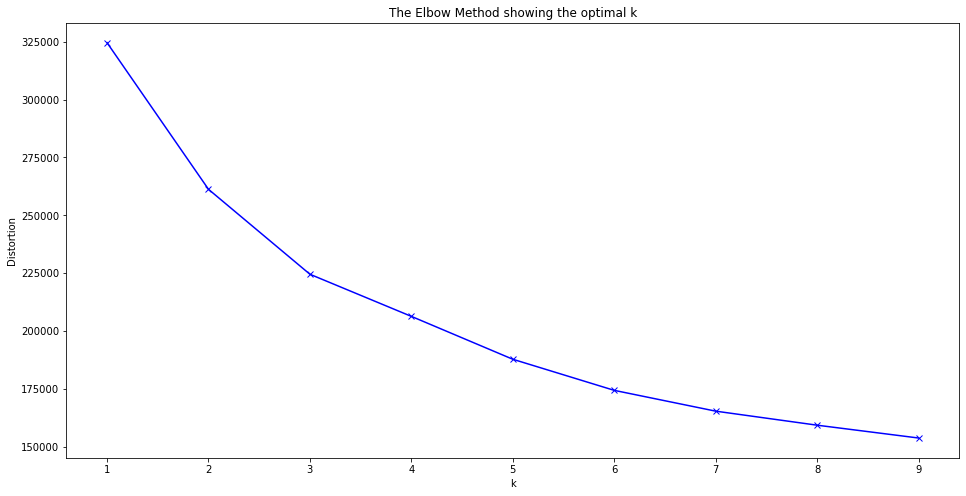

In [121]:
elbow(df_seg)
#We observe that elbow is approximately 4

In [122]:
X = df_seg
kmeans = KMeans(n_clusters=4)
res = kmeans.fit(X)
y = res.predict(X)
y = y.tolist()
df_sub_1['group'] = y

In [124]:
df_sub_1

subid package_type  num_weekly_services_utilized preferred_genre  \
380374  23383224         base                           NaN          comedy   
496617  26844789     enhanced                      3.362885        regional   
356799  29417030         base                           NaN           drama   
681701  26723159         base                      3.731089          comedy   
284782  24810928         base                           NaN          comedy   
...          ...          ...                           ...             ...   
603751  25835684         base                      2.169904           drama   
509326  21434712     enhanced                      2.594078          comedy   
229587  25843074     enhanced                      2.361370          comedy   
281340  24799085         base                           NaN          comedy   
598241  20166335         base                           NaN          comedy   

                       intended_use  weekly_consumption_hour  \
380374  access to exclusive content                22.951579   
496617                  replace OTT                36.001186   
356799                  replace OTT                20.051667   
681701                  replace OTT                22.951579   
284782  access to exclusive content                20.051667   
...                             ...                      ...   
603751  access to exclusive content                24.401536   
509326               supplement OTT                28.751405   
229587                  replace OTT                27.301448   
281340  access to exclusive content                31.651317   
598241                  replace OTT                25.851492   

        num_ideal_streaming_services  retarget_TF   age male_TF  ...  \
380374                           NaN        False  70.0   False  ...   
496617                      1.951776        False  25.0    True  ...   
356799                           NaN        False  30.0   False  ...   
681701                      2.506384        False  28.0   False  ...   
284782                           NaN        False  70.0   False  ...   
...                              ...          ...   ...     ...  ...   
603751                      1.881068        False  43.0   False  ...   
509326                      1.905485        False  38.0   False  ...   
229587                      1.835189         True  49.0   False  ...   
281340                           NaN        False  45.0   False  ...   
598241                           NaN        False  55.0   False  ...   

       cancel_before_trial_end trial_end_date initial_credit_card_declined  \
380374                   False     2020-03-16                        False   
496617                   False     2019-12-22                        False   
356799                   False     2020-02-11                        False   
681701                   False     2019-10-20                        False   
284782                    True     2020-03-18                        False   
...                        ...            ...                          ...   
603751                   False     2020-01-16                        False   
509326                   False     2019-12-02                        False   
229587                    True     2019-12-21                        False   
281340                    True     2020-01-05                         True   
598241                   False     2019-12-11                        False   

       revenue_net  join_fee language  paid_TF  refund_after_trial_TF  \
380374      0.0000    0.3303       ar    False                  False   
496617      0.0000    0.1101       ar    False                  False   
356799      0.0000    0.0367       ar    False                  False   
681701      0.0000    0.0367       ar    False                  False   
284782      0.0000    0.3303       ar     True                   True   
...            ...       ...      ...      ...       

In [133]:
gender_list = list(set(df_sub_1['male_TF']))
dict_gender = defaultdict(list)
dict_gender['gender'] = gender_list
for i in range(4):
    df_num = i + 1
    num_list = list()
    for gender in gender_list:
        num_list.append((locals()['df_group'+str(df_num)]['male_TF'] == gender).sum())
    dict_gender['group'+str(df_num)] = num_list
df_gender =pd.DataFrame.from_dict(dict_gender)

In [134]:
df_gender

gender  group1  group2  group3  group4
0   False   38869   28313   47190   19612
1    True    5630    5346    5523    4898

In [135]:
package_list = list(set(df_sub_1['package_type']))
dict_package = defaultdict(list)
dict_package['package_type'] = package_list
for i in range(4):
    df_num = i + 1
    num_list = list()
    for package in package_list:
        num_list.append((locals()['df_group'+str(df_num)]['package_type'] == package).sum())
    dict_package['group'+str(df_num)] = num_list
df_package =pd.DataFrame.from_dict(dict_package)

In [136]:
df_package

package_type  group1  group2  group3  group4
0     enhanced   36193       0       0   16951
1         base       0   33659   52713       0
2      economy    8306       0       0    7559

In [137]:
genre_list = list(set(df_sub_1['preferred_genre']))
dict_genre = defaultdict(list)
dict_genre['preferred_genre'] = genre_list
for i in range(4):
    df_num = i + 1
    num_list = list()
    for genre in genre_list:
        num_list.append((locals()['df_group'+str(df_num)]['preferred_genre'] == genre).sum())
    dict_genre['group'+str(df_num)] = num_list
df_genre =pd.DataFrame.from_dict(dict_genre)

In [138]:
df_genre

preferred_genre  group1  group2  group3  group4
0   international       0    3485       0    2575
1          comedy   44499       0   52713       0
2           drama       0   23808       0   16111
3        regional       0    4211       0    4205
4           other       0    2155       0    1619

In [139]:
age_list = list(set(df_sub_1['age']))
dict_age = defaultdict(list)
dict_age['age'] = age_list
for i in range(4):
    df_num = i + 1
    num_list = list()
    for age in age_list:
        num_list.append((locals()['df_group'+str(df_num)]['age'] == age).sum())
    dict_age['group'+str(df_num)] = num_list
df_age =pd.DataFrame.from_dict(dict_age)

In [140]:
df_age

age  group1  group2  group3  group4
0    0.000000      17       9      18       7
1   10.000000       1       0       2       0
2   16.000000       1       0       0       0
3   18.000000     491      92     259     127
4   19.000000     253      60     156      78
..        ...     ...     ...     ...     ...
95  68.631655       0       0       1       0
96  68.814363       0       0       1       0
97  22.426967       0       1       0       0
98  74.390053       0       0       1       0
99  31.414988       0       0       1       0

[100 rows x 5 columns]

In [141]:
technical_list = list(set(df_sub_1['attribution_technical']))
dict_technical = defaultdict(list)
dict_technical['attribution_technical'] = technical_list
for i in range(4):
    df_num = i + 1
    num_list = list()
    for technical in technical_list:
        num_list.append((locals()['df_group'+str(df_num)]['attribution_technical'] == technical).sum())
    dict_technical['group'+str(df_num)] = num_list
df_technical =pd.DataFrame.from_dict(dict_technical)

In [142]:
df_technical

attribution_technical  group1  group2  group3  group4
0                 discovery     687     551     870     400
1                   display     336     301     439     196
2                   organic    4066    3189    4716    2404
3     brand sem intent bing     447     442     696     260
4                        tv       0       0       2       2
5                  appstore      10       8      18       4
6              bing_organic      65      82     120      49
7                      bing     279     225     348     134
8            google_organic    2217    1717    2723    1266
9                   podcast     256     183     291     139
10              email_blast    1200    1062    1591     651
11        pinterest_organic       4       6      10       6
12                pinterest    1404     925    1658     587
13                    email    4753    3689    5682    2602
14                      vod      79      65     107      40
15               influencer       8       4       6       2
16                   criteo       7       5      11       2
17              direct_mail      30      27      58      20
18                    other     406     303     580     209
19                    quora      34      15      33      18
20                affiliate    2246    1868    2219    1545
21                 internal     217     154     276     100
22                  samsung       1       2       0       0
23                 referral     903     773    1075     558
24         content_greatist       0       1       2       1
25                      ott      46      29      57      23
26                playstore       3       1       6       0
27                  youtube     267     167     320     118
28  brand sem intent google    3560    2960    4391    2143
29                 facebook   13576   10489   17430    7310
30                   search    6666    3873    6140    3314
31         facebook_organic     726     543     838     407

A/B Test

In [149]:
#list(df_id)

[(20000062,
               subid       date  app_opens  cust_service_mssgs  \
  16622651  20000062 2019-06-30        1.0                 0.0   
  16622654  20000062 2019-07-01        1.0                 1.0   
  16622655  20000062 2019-07-02        1.0                 2.0   
  16622661  20000062 2019-07-04        1.0                 0.0   
  
            num_videos_completed  num_videos_more_than_30_seconds  \
  16622651                   2.0                              7.0   
  16622654                   4.0                              6.0   
  16622655                   0.0                              5.0   
  16622661                   0.0                              5.0   
  
            num_videos_rated  num_series_started  payment_period  
  16622651               0.0                 0.0             0.0  
  16622654               0.0                 1.0             0.0  
  16622655               0.0                 0.0             0.0  
  16622661               0.0           

In [161]:
#df_t = pd.DataFrame(df_eng.groupby('subid')['payment_period'].max())

In [162]:
#df_t

payment_period
subid                   
20000062             0.0
20000405             0.0
20000604             1.0
20000685             1.0
20000741             0.0
...                  ...
29999740             0.0
29999820             0.0
29999822             0.0
29999889             2.0
29999945             1.0

[135019 rows x 1 columns]

In [167]:
#df_whole = pd.merge(df_t,df_reps,on=['subid'],how='left')

In [173]:
#df_whole['num_trial_days'].value_counts()

14    209776
0         83
Name: num_trial_days, dtype: int64

In [174]:
df_reps['num_trial_days'].value_counts()

14    1968089
7      160596
0       79958
Name: num_trial_days, dtype: int64

In [85]:
df_reps

customer_service_rep_id     subid  current_sub_TF cancel_date  \
4                       36189811  25108574           False         NaT   
5                       36189811  25108574           False         NaT   
6                       36189811  25108574           False         NaT   
7                       36189811  25108574           False         NaT   
8                       31174901  25914865            True         NaT   
...                          ...       ...             ...         ...   
2248409                 30859916  26845271           False         NaT   
2248410                 30859916  26845271           False         NaT   
2248411                 30859916  26845271           False         NaT   
2248412                 30859916  26845271           False         NaT   
2248413                 30859916  26845271           False         NaT   

        account_creation_date  num_trial_days  trial_completed_TF  \
4         2019-11-26 03:30:29               7                True   
5         2019-11-26 03:30:29               7                True   
6         2019-11-26 03:30:29               7                True   
7         2019-11-26 03:30:29               7                True   
8         2020-03-19 01:20:25              14                True   
...                       ...             ...                 ...   
2248409   2019-06-30 06:24:24               0                True   
2248410   2019-06-30 06:24:24               0                True   
2248411   2019-06-30 06:24:24               0                True   
2248412   2019-06-30 06:24:24               0                True   
2248413   2019-06-30 06:24:24               0                True   

        billing_channel  revenue_net_1month  payment_period  \
4                itunes              1.1377               0   
5                itunes              1.1377               1   
6                itunes              1.1377               2   
7                itunes              1.1377               3   
8                itunes              1.1377               0   
...                 ...                 ...             ...   
2248409          google              0.6239               3   
2248410          google              0.6239               4   
2248411          google              0.6239               5   
2248412          google              0.6239               6   
2248413          google              0.6239               7   

               last_payment        next_payment renew  
4       2019-11-26 03:30:29 2019-11-26 03:30:29   NaN  
5       2019-11-26 03:30:29 2019-12-27 03:30:29   NaN  
6       2019-12-27 03:30:29 2020-01-26 03:30:29   NaN  
7       2020-01-26 03:30:29                 NaT   NaN  
8       2020-03-19 01:20:25 2020-04-02 01:20:25   NaN  
...                     ...                 ...   ...  
2248409 2019-08-27 20:23:27 2019-09-24 20:23:29   NaN  
2248410 2019-09-24 20:23:29 2019-10-25 20:23:28   NaN  
2248411 2019-10-25 20:23:28 2019-11-24 20:23:29   NaN  
2248412 2019-11-24 20:23:29 2019-12-25 20:23:27   NaN  
2248413 2019-12-25 20:23:27                 NaT   NaN  

[2208643 rows x 13 columns]

In [89]:
df_reps['current_sub_TF'] = df_reps['current_sub_TF'].astype(str)
df_reps['current_sub_TF'] = df_reps['current_sub_TF'].map(
                   {"True":1 ,"False":0})

In [115]:
df_reps

customer_service_rep_id     subid  current_sub_TF cancel_date  \
4                       36189811  25108574               0         NaT   
5                       36189811  25108574               0         NaT   
6                       36189811  25108574               0         NaT   
7                       36189811  25108574               0         NaT   
8                       31174901  25914865               1         NaT   
...                          ...       ...             ...         ...   
2248409                 30859916  26845271               0         NaT   
2248410                 30859916  26845271               0         NaT   
2248411                 30859916  26845271               0         NaT   
2248412                 30859916  26845271               0         NaT   
2248413                 30859916  26845271               0         NaT   

        account_creation_date  num_trial_days  trial_completed_TF  \
4         2019-11-26 03:30:29               7                True   
5         2019-11-26 03:30:29               7                True   
6         2019-11-26 03:30:29               7                True   
7         2019-11-26 03:30:29               7                True   
8         2020-03-19 01:20:25              14                True   
...                       ...             ...                 ...   
2248409   2019-06-30 06:24:24               0                True   
2248410   2019-06-30 06:24:24               0                True   
2248411   2019-06-30 06:24:24               0                True   
2248412   2019-06-30 06:24:24               0                True   
2248413   2019-06-30 06:24:24               0                True   

        billing_channel  revenue_net_1month  payment_period  \
4                itunes              1.1377               0   
5                itunes              1.1377               1   
6                itunes              1.1377               2   
7                itunes              1.1377               3   
8                itunes              1.1377               0   
...                 ...                 ...             ...   
2248409          google              0.6239               3   
2248410          google              0.6239               4   
2248411          google              0.6239               5   
2248412          google              0.6239               6   
2248413          google              0.6239               7   

               last_payment        next_payment renew  
4       2019-11-26 03:30:29 2019-11-26 03:30:29   NaN  
5       2019-11-26 03:30:29 2019-12-27 03:30:29   NaN  
6       2019-12-27 03:30:29 2020-01-26 03:30:29   NaN  
7       2020-01-26 03:30:29                 NaT   NaN  
8       2020-03-19 01:20:25 2020-04-02 01:20:25   NaN  
...                     ...                 ...   ...  
2248409 2019-08-27 20:23:27 2019-09-24 20:23:29   NaN  
2248410 2019-09-24 20:23:29 2019-10-25 20:23:28   NaN  
2248411 2019-10-25 20:23:28 2019-11-24 20:23:29   NaN  
2248412 2019-11-24 20:23:29 2019-12-25 20:23:27   NaN  
2248413 2019-12-25 20:23:27                 NaT   NaN  

[2208643 rows x 13 columns]

In [93]:
res = stats.ttest_ind(df_reps[df_reps['num_trial_days']== 7].current_sub_TF, 
                      df_reps[df_reps['num_trial_days']== 14].current_sub_TF,
                      equal_var='unequal', alternative='less')
print(f'p-value for single sided test: {res.pvalue:.10f}')

p-value for single sided test: 0.0000000000


In [94]:
df_7 = df_reps[df_reps.num_trial_days==7]

In [116]:
df_7

customer_service_rep_id     subid  current_sub_TF cancel_date  \
4                       36189811  25108574               0         NaT   
5                       36189811  25108574               0         NaT   
6                       36189811  25108574               0         NaT   
7                       36189811  25108574               0         NaT   
786                     34814570  27350108               1         NaT   
...                          ...       ...             ...         ...   
2248282                 38865556  22540411               0         NaT   
2248283                 38865556  22540411               0         NaT   
2248284                 38865556  22540411               0         NaT   
2248311                 34434834  23328684               0         NaT   
2248312                 34434834  23328684               0         NaT   

        account_creation_date  num_trial_days  trial_completed_TF  \
4         2019-11-26 03:30:29               7                True   
5         2019-11-26 03:30:29               7                True   
6         2019-11-26 03:30:29               7                True   
7         2019-11-26 03:30:29               7                True   
786       2020-03-27 22:01:46               7                True   
...                       ...             ...                 ...   
2248282   2019-06-30 00:05:19               7                True   
2248283   2019-06-30 00:05:19               7                True   
2248284   2019-06-30 00:05:19               7                True   
2248311   2019-06-30 00:04:12               7                True   
2248312   2019-06-30 00:04:12               7                True   

        billing_channel  revenue_net_1month  payment_period  \
4                itunes              1.1377               0   
5                itunes              1.1377               1   
6                itunes              1.1377               2   
7                itunes              1.1377               3   
786              itunes              1.1377               0   
...                 ...                 ...             ...   
2248282          itunes              1.1377               2   
2248283          itunes              1.1377               3   
2248284          itunes              1.1377               4   
2248311          itunes              1.1377               0   
2248312          itunes              1.1377               1   

               last_payment        next_payment renew  
4       2019-11-26 03:30:29 2019-11-26 03:30:29   NaN  
5       2019-11-26 03:30:29 2019-12-27 03:30:29   NaN  
6       2019-12-27 03:30:29 2020-01-26 03:30:29   NaN  
7       2020-01-26 03:30:29                 NaT   NaN  
786     2020-03-27 22:01:46 2020-04-03 22:01:46   NaN  
...                     ...                 ...   ...  
2248282 2019-08-07 00:05:19 2019-09-04 00:05:19   NaN  
2248283 2019-09-04 00:05:19 2019-10-04 23:05:19   NaN  
2248284 2019-10-04 23:05:19                 NaT   NaN  
2248311 2019-06-30 00:04:12 2019-07-07 00:04:12   NaN  
2248312 2019-07-07 00:04:12                 NaT   NaN  

[160596 rows x 13 columns]

In [117]:
df_7_T = df_7[df_7.current_sub_TF == 1]
df_7_F = df_7[df_7.current_sub_TF == 0]

In [118]:
con_7 = df_7_T.shape[0]/df_7.shape[0]

In [119]:
con_7

0.23560362649131983

In [120]:
df_14 = df_reps[df_reps.num_trial_days==14]

In [121]:
df_14_T = df_14[df_14.current_sub_TF == 1]
df_14_F = df_14[df_14.current_sub_TF == 0]

In [122]:
con_14 = df_14_T.shape[0]/df_14.shape[0]

In [123]:
con_14

0.3812932240361081

In [ ]:
#con_14 > con_7

Churn

In [47]:
df_churn = pd.read_csv('df_sub_churn.csv')

In [48]:
df_churn.head()

subid package_type  num_weekly_services_utilized preferred_genre  \
0  21724479      economy                           NaN          comedy   
1  23383224         base                           NaN          comedy   
2  26844789     enhanced                      3.362885        regional   
3  29417030         base                           NaN           drama   
4  26723159         base                      3.731089          comedy   

                  intended_use  weekly_consumption_hour  \
0  access to exclusive content                      NaN   
1  access to exclusive content                22.951579   
2                  replace OTT                36.001186   
3                  replace OTT                20.051667   
4                  replace OTT                22.951579   

   num_ideal_streaming_services  retarget_TF   age male_TF  ... paid_TF  \
0                           NaN        False   NaN   False  ...    True   
1                           NaN        False  70.0   False  ...   False   
2                      1.951776        False  25.0    True  ...   False   
3                           NaN        False  30.0   False  ...   False   
4                      2.506384        False  28.0   False  ...   False   

  refund_after_trial_TF      payment_type current_sub_TF  app_opens  \
0                 False  Standard Charter            NaN        NaN   
1                 False               NaN            NaN        NaN   
2                 False               NaN          False        2.0   
3                 False               NaN            NaN        NaN   
4                 False               NaN            NaN        NaN   

  cust_service_mssgs  num_videos_completed  num_videos_more_than_30_seconds  \
0                NaN                   NaN                              NaN   
1                NaN                   NaN                              NaN   
2                2.0                  13.0                             13.0   
3                NaN                   NaN                              NaN   
4                NaN                   NaN                              NaN   

  num_videos_rated  num_series_started  
0              NaN                 NaN  
1              NaN                 NaN  
2              0.0                 1.0  
3              NaN                 NaN  
4              NaN                 NaN  

[5 rows x 36 columns]

In [49]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227628 entries, 0 to 227627
Data columns (total 36 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   subid                            227628 non-null  int64  
 1   package_type                     192054 non-null  object 
 2   num_weekly_services_utilized     117178 non-null  float64
 3   preferred_genre                  191302 non-null  object 
 4   intended_use                     224079 non-null  object 
 5   weekly_consumption_hour          189698 non-null  float64
 6   num_ideal_streaming_services     115458 non-null  float64
 7   retarget_TF                      227628 non-null  bool   
 8   age                              192459 non-null  float64
 9   male_TF                          227359 non-null  object 
 10  country                          227628 non-null  object 
 11  attribution_technical            227628 non-null  object 
 12  at

In [50]:
feature_list = ['num_weekly_services_utilized','weekly_consumption_hour','age','revenue_net','app_opens','num_videos_completed','num_series_started','current_sub_TF']

In [51]:
df_churn = df_churn[feature_list]

In [52]:
df_churn = df_churn.dropna()

In [53]:
df_churn = df_churn.loc[df_churn['age']<=100]

In [54]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79482 entries, 2 to 227624
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   num_weekly_services_utilized  79482 non-null  float64
 1   weekly_consumption_hour       79482 non-null  float64
 2   age                           79482 non-null  float64
 3   revenue_net                   79482 non-null  float64
 4   app_opens                     79482 non-null  float64
 5   num_videos_completed          79482 non-null  float64
 6   num_series_started            79482 non-null  float64
 7   current_sub_TF                79482 non-null  object 
dtypes: float64(7), object(1)
memory usage: 5.5+ MB


In [55]:
df_churn['current_sub_TF'] = df_churn['current_sub_TF'].astype('string')
df_churn['current_sub_TF'] = df_churn['current_sub_TF'].map({"True":0 ,"False":1})
df_churn = df_churn.rename(columns = {'current_sub_TF':'churn_TF'})

In [56]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79482 entries, 2 to 227624
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   num_weekly_services_utilized  79482 non-null  float64
 1   weekly_consumption_hour       79482 non-null  float64
 2   age                           79482 non-null  float64
 3   revenue_net                   79482 non-null  float64
 4   app_opens                     79482 non-null  float64
 5   num_videos_completed          79482 non-null  float64
 6   num_series_started            79482 non-null  float64
 7   churn_TF                      79482 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 5.5 MB


In [57]:
df_train, df_test = model_selection.train_test_split(df_churn, test_size=0.3)

In [58]:
y_col_name = 'churn_TF'
x_col_name = ['num_weekly_services_utilized','weekly_consumption_hour','age','revenue_net','app_opens','num_videos_completed','num_series_started']
add_constant_TF = True

In [59]:
# --- preprocess data for model routine format requirements
if add_constant_TF:
    x_col_name.append('const')
    df_train = sm.add_constant(df_train)
    df_test = sm.add_constant(df_test)

In [60]:
df_train

const  num_weekly_services_utilized  weekly_consumption_hour   age  \
225859    1.0                      3.763494                28.751405  29.0   
123475    1.0                      2.384938                22.951579  55.0   
53610     1.0                      2.700118                30.201361  24.0   
170039    1.0                      3.731093                37.451142  22.0   
226612    1.0                      2.405557                28.751405  36.0   
...       ...                           ...                      ...   ...   
5178      1.0                      3.732565                24.401536  24.0   
154681    1.0                      3.583808                34.551230  56.0   
184503    1.0                      2.773761                30.201361  53.0   
83499     1.0                      2.670664                27.301448  37.0   
201760    1.0                      2.965227                28.751405  25.0   

        revenue_net  app_opens  num_videos_completed  num_series_started  \
225859       0.0000       17.0                  25.0                 4.0   
123475       0.0000        9.0                   9.0                 1.0   
53610        0.0000       10.0                  11.0                 1.0   
170039       4.5875       22.5                  78.5                21.5   
226612       0.0000        4.0                  10.0                 2.0   
...             ...        ...                   ...                 ...   
5178         0.0000       14.0                  68.0                12.0   
154681       0.0000        8.0                   9.0                 1.0   
184503       0.0000       12.0                  34.0                11.0   
83499        0.0000        7.0                   7.0                 2.0   
201760       0.0000        6.0                   5.0                 1.0   

        churn_TF  
225859         1  
123475         1  
53610          1  
170039         0  
226612         1  
...          ...  
5178           1  
154681         1  
184503         1  
83499          1  
201760         1  

[55637 rows x 9 columns]

In [61]:
# --- fit linear probability model
lpm_model = sm.OLS(endog=df_train[y_col_name], exog=df_train[x_col_name])
lpm_results = lpm_model.fit()
print("\nRESULTS OF LOGIT MODEL FITTING\n")
print(lpm_results.summary())


RESULTS OF LOGIT MODEL FITTING

                            OLS Regression Results                            
Dep. Variable:               churn_TF   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     8003.
Date:                Mon, 13 Dec 2021   Prob (F-statistic):               0.00
Time:                        17:58:58   Log-Likelihood:                -8079.3
No. Observations:               55637   AIC:                         1.617e+04
Df Residuals:                   55629   BIC:                         1.625e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

In [62]:
# --- fit logistic regression
logit_model = sm.Logit(endog=df_train[y_col_name], exog=df_train[x_col_name])
logit_results = logit_model.fit()
print("\nRESULTS OF LOGIT MODEL FITTING\n")
print(logit_results.summary())

Optimization terminated successfully.
         Current function value: 0.249988
         Iterations 8

RESULTS OF LOGIT MODEL FITTING

                           Logit Regression Results                           
Dep. Variable:               churn_TF   No. Observations:                55637
Model:                          Logit   Df Residuals:                    55629
Method:                           MLE   Df Model:                            7
Date:                Mon, 13 Dec 2021   Pseudo R-squ.:                  0.4937
Time:                        17:59:01   Log-Likelihood:                -13909.
converged:                       True   LL-Null:                       -27469.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
num_weekly_services_utilized    -0.0806

In [63]:
# ----- EVALUATE MODEL PERFORMANCE -----
# --- evaluate model predictions on test set graphically
df_test['prob_churn_lpm'] = lpm_results.predict(df_test[x_col_name])
df_test['prob_churn_logit'] = logit_results.predict(df_test[x_col_name])

IndexError: list index out of range

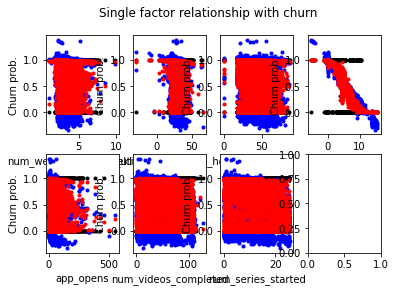

In [64]:
# plot predictions vs. data
select_plot_coef = [x for x in x_col_name if x != 'const']
n_rows = 2
n_cols = math.ceil(len(select_plot_coef) / n_rows)
fig, axes = plt.subplots(n_rows, n_cols)
fig.suptitle('Single factor relationship with churn')
for i in range(n_rows):
    for j in range(n_cols):
        select_coef = select_plot_coef[i * n_cols + j]
        axes[i, j].plot(df_test[select_coef], df_test['churn_TF'], 'k.')
        axes[i, j].plot(df_test[select_coef], df_test['prob_churn_lpm'], 'b.')
        axes[i, j].plot(df_test[select_coef], df_test['prob_churn_logit'], 'r.')
        axes[i, j].set(xlabel=select_coef, ylabel='Churn prob.')
fig.legend(labels=['Churn T/F (actual)', 'Linear probability model', 'Logit probability'])

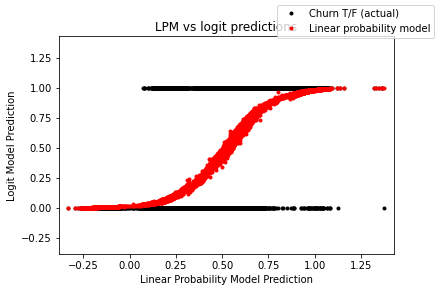

In [65]:
# compare lpm and logit predictions
fig = plt.figure()
ax = plt.gca()
ax.plot(df_test[['prob_churn_lpm']], df_test[['churn_TF']], 'k.')
ax.plot(df_test[['prob_churn_lpm']], df_test[['prob_churn_logit']], 'r.')
plt.ylim(df_test[['prob_churn_lpm', 'prob_churn_logit']].min().min()-.05, df_test[['prob_churn_lpm', 'prob_churn_logit']].max().max()+.05)
plt.xlim(ax.get_ylim())
plt.title('LPM vs logit predictions')
plt.xlabel('Linear Probability Model Prediction')
plt.ylabel('Logit Model Prediction')
fig.legend(labels=['Churn T/F (actual)', 'Linear probability model', 'Logit probability'])

In [67]:
def get_gini_info(actual, pred_prob):
    # format[[obs0_pred0, obs0_pred1], [obs1_pred0, obs1_pred1]]; rows (i) are observed, columns (j) are predicted
    confusion_matrix_list = list()
    for t in [x / 100 for x in range(0, 100, 33)]:
        pred = [1 if (x > t) else 0 for x in pred_prob]
        confusion_matrix_list.append(confusion_matrix(actual, pred))
        # confusion_matrix_list.append(model.pred_table(threshold=t))

    # create Gini coefficient plots
    false_positives = list()
    true_positives = list()
    for t in confusion_matrix_list:
        true_positives.append(t[1, 1])
        false_positives.append(t[0, 1])

    return confusion_matrix_list, false_positives, true_positives

In [68]:
# ------ DEFINE FUNCTIONS -----
def apply_offers(df, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn):
    df_f = copy.deepcopy(df)

    # set offer parameters for all observations
    df_f['price_no_offer'] = base_price
    df_f.loc[df_f['churn_TF'] == 1, 'price_no_offer'] = 0  # if the person churns they will pay 0

    # determine whether indiviudals accept offer
    df_f.loc[df_f['churn_TF'] == 1, 'accept_offer_prob'] = acceptance_rate_churn  # those who were going to churn are less likely to want the offer than those who were going to stay
    df_f.loc[df_f['churn_TF'] == 0, 'accept_offer_prob'] = acceptance_rate_nonchurn
    df_f['would_accept_offer_rand_draw'] = (df_f['random_draws'] < df_f['accept_offer_prob'])  # randomly select the individuals who would accept an offer based on their probability of acceptance

    # make offer under lpm predictions for select threshold
    df_f['make_offer_lpm'] = (df_f['prob_churn_lpm'] > threshold)     # predict whether individual will churn or not
    df_f['accept_offer_lpm'] = (df_f['make_offer_lpm'] & df_f['would_accept_offer_rand_draw'])
    df_f['price_lpm_offer'] = df_f['price_no_offer']  # initialize prices from "do nothing case"
    df_f.loc[df_f['accept_offer_lpm'], 'price_lpm_offer'] = base_price * (1-discount_amount)    # for those who were both made an offer and would accept, set prices to discounted price

    # make offer under logit predictions for select threshold
    df_f['make_offer_logit'] = (df_f['prob_churn_logit'] > threshold)     # predict whether individual will churn or not
    df_f['accept_offer_logit'] = (df_f['make_offer_logit'] & df_f['would_accept_offer_rand_draw'])
    df_f['price_logit_offer'] = df_f['price_no_offer']  # initialize prices from "do nothing case"
    df_f.loc[df_f['accept_offer_logit'], 'price_logit_offer'] = base_price * (1-discount_amount)    # for those who were both made an offer and would accept, set prices to discounted price

    df_impact = pd.DataFrame(index=cases, columns=['subs', 'revenue', 'lift_from_no_offer'])
    for c in cases:
        df_impact.loc[c, 'subs'] = (df_f['price_' + c] > 0).sum()
        df_impact.loc[c, 'revenue'] = df_f['price_' + c].sum()
    for c in cases:
        df_impact.loc[c, 'lift_from_no_offer'] = df_impact.loc[c, 'revenue'] / df_impact.loc['no_offer', 'revenue'] - 1

    return df_f, df_impact

In [69]:
# --- evaluate model predictions using numerical quantification (ROC curves)
# make confusion matrices
logit_conf_mat, logit_false_positives, logit_true_positives = get_gini_info(df_test['churn_TF'], df_test['prob_churn_logit'])
lpm_conf_mat, lpm_false_positives, lpm_true_positives = get_gini_info(df_test['churn_TF'], df_test['prob_churn_lpm'])

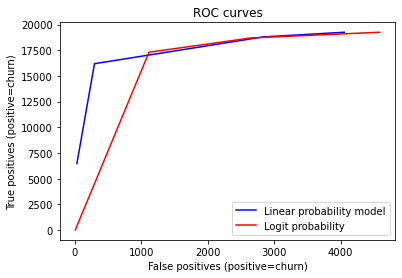

In [70]:
# plot ROC curves
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(lpm_false_positives, lpm_true_positives, 'b-')
ax1.plot(logit_false_positives, logit_true_positives, 'r-')
plt.title('ROC curves')
plt.xlabel('False positives (positive=churn)')
plt.ylabel('True positives (positive=churn)')
plt.legend(labels=['Linear probability model', 'Logit probability'])

In [71]:
# ----- TEST RETENTION OFFER SCENARIOS -----
# evaluate the impact of an offer
acceptance_rate_nonchurn = 1
acceptance_rate_churn = 0.3
threshold = 0.5
base_price = 10
discount_amount = 0.3
cases = ['no_offer', 'lpm_offer', 'logit_offer']

In [72]:
# draw whether individual would accept an offer or not - assume probability of acceptance is independent of offer attractiveness
df_test['random_draws'] = np.random.random(df_test.shape[0])

In [73]:
# base assessment
df_test, df_impact = apply_offers(df_test, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

In [74]:
# test sensitivity to thresholds
df_lift_threshold = pd.DataFrame(index=range(0, 100, 1), columns=['threshold'] + cases)
for t_ind in df_lift_threshold.index:
    t_threshold = t_ind / 100
    _, t_df_impact = apply_offers(df_test, t_threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_threshold.loc[t_ind, 'threshold'] = t_threshold
    df_lift_threshold.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_threshold, t_ind

In [75]:
# test sensitivity to acceptance rate for churners
df_lift_acceptance_rate_churn = pd.DataFrame(index=range(0, 100, 1), columns=['acceptance_rate_churn'] + cases)
for t_ind in df_lift_acceptance_rate_churn.index:
    t_acceptance_rate_churn = t_ind / 100
    _, t_df_impact = apply_offers(df_test, threshold, base_price, discount_amount, cases, t_acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_acceptance_rate_churn.loc[t_ind, 'acceptance_rate_churn'] = t_acceptance_rate_churn
    df_lift_acceptance_rate_churn.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_acceptance_rate_churn, t_ind

In [81]:
# test sensitivity to offer discount amount
df_lift_discount_amount = pd.DataFrame(index=range(0, 100, 1), columns=['discount_amount'] + cases)
for t_ind in df_lift_discount_amount.index:
    t_discount_amount = t_ind / 100
    acceptance_rate_churn = t_discount_amount
    _, t_df_impact = apply_offers(df_test, threshold, base_price, t_discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_discount_amount.loc[t_ind, 'discount_amount'] = t_discount_amount
    df_lift_discount_amount.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_discount_amount, t_ind

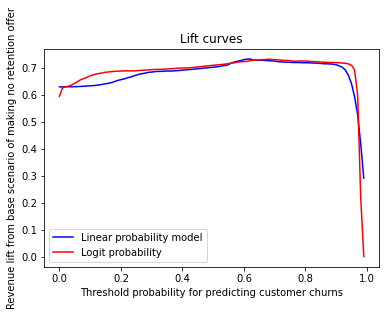

In [77]:
# --- plot lift curves
# Threshold sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['lpm_offer'], 'b-')
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Threshold probability for predicting customer churns')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])

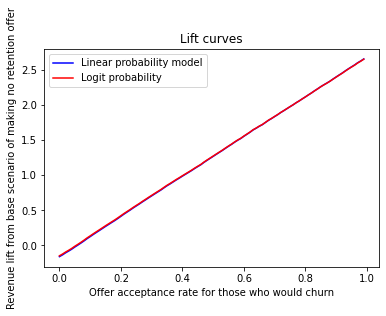

In [78]:
# Acceptance rate sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_acceptance_rate_churn['acceptance_rate_churn'], df_lift_acceptance_rate_churn['lpm_offer'], 'b-')
ax1.plot(df_lift_acceptance_rate_churn['acceptance_rate_churn'], df_lift_acceptance_rate_churn['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Offer acceptance rate for those who would churn')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])

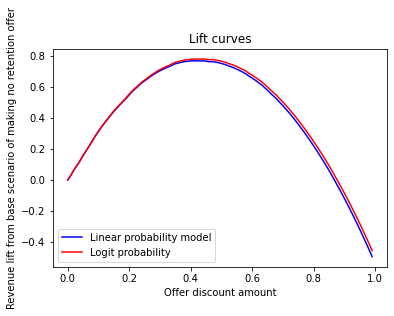

In [82]:
# Discount amount sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['lpm_offer'], 'b-')
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Offer discount amount')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])